In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('E:\\pyathon_Class\\Class_Home_Practice\\Interview_project\\Interview_Dummies_2.csv')

In [4]:
df.head()

,Client name,Industry,Location,Position to be closed,Interview Type,Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,...,Call,Alt_Number,Resume_Print,Landmark_details,Call letter,Expected Attendance,Observed Attendance,Marital Status,nloc_vs_intloc,nloc_vs_jloc
0,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,0,1,0,1,1,1,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,0,0,1,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [5]:
X=df.drop('Observed Attendance',axis=1)

In [6]:
y=df['Observed Attendance']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logmodel=LogisticRegression()

In [11]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predictions=logmodel.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
print ('Confusion Matrix')
print (confusion_matrix(y_test,predictions))
print('\n')
print ('Classification Reprot')
print (classification_report(y_test,predictions))       

Confusion Matrix
[[ 58  78]
 [  7 226]]


Classification Reprot
             precision    recall  f1-score   support

          0       0.89      0.43      0.58       136
          1       0.74      0.97      0.84       233

avg / total       0.80      0.77      0.74       369



KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

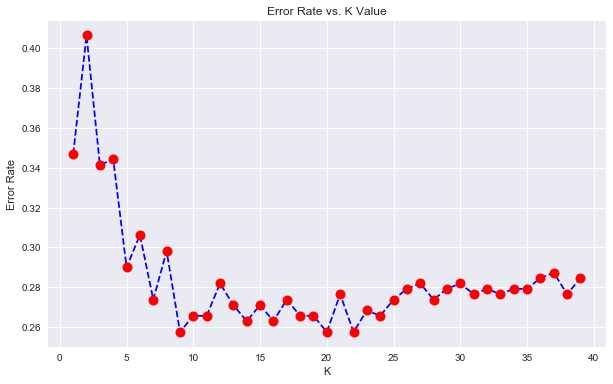

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[ 45  91]
 [  4 229]]


             precision    recall  f1-score   support

          0       0.92      0.33      0.49       136
          1       0.72      0.98      0.83       233

avg / total       0.79      0.74      0.70       369



# Appling SVM

In [19]:
from sklearn.svm import SVC

In [20]:
model=SVC()

In [21]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
predictions = model.predict(X_test)

In [23]:
print ('Confusion Matrix')
print (confusion_matrix(y_test,predictions))
print('\n')
print ('Classification Reprot')
print (classification_report(y_test,predictions))   

Confusion Matrix
[[ 58  78]
 [  7 226]]


Classification Reprot
             precision    recall  f1-score   support

          0       0.89      0.43      0.58       136
          1       0.74      0.97      0.84       233

avg / total       0.80      0.77      0.74       369



# Finding best parameters

In [24]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']} 

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.651568, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.653846, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.660839, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .... C=0.1, gamma=1, kernel=linear, score=0.777003, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .... C=0.1, gamma=1, kernel=linear, score=0.793706, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .... C=0.1, gamma=1, kernel=linear, score=0.790210, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.637631, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] . C=1, gamma=0.0001, kernel=linear, score=0.790210, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........ C=10, gamma=1, kernel=rbf, score=0.780488, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........ C=10, gamma=1, kernel=rbf, score=0.786713, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........ C=10, gamma=1, kernel=rbf, score=0.772727, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..... C=10, gamma=1, kernel=linear, score=0.780488, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..... C=10, gamma=1, kernel=linear, score=0.800699, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..... C=10, gamma=1, kernel=linear, score=0.786713, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV]  C=100, gamma=0.0001, kernel=linear, score=0.800699, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.786713, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...... C=1000, gamma=1, kernel=rbf, score=0.780488, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...... C=1000, gamma=1, kernel=rbf, score=0.786713, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...... C=1000, gamma=1, kernel=rbf, score=0.772727, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ... C=1000, gamma=1, kernel=linear, score=0.780488, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ... C=1000, gamma=1, kernel=linear, score=0.800699, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [28]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [30]:
grid_predictions = grid.predict(X_test)

In [31]:
print('\n')
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))



[[ 58  78]
 [  7 226]]


             precision    recall  f1-score   support

          0       0.89      0.43      0.58       136
          1       0.74      0.97      0.84       233

avg / total       0.80      0.77      0.74       369



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree=DecisionTreeClassifier(criterion='gini')

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [35]:
predictions=dtree.predict(X_test)

In [36]:
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



[[ 58  78]
 [  9 224]]


             precision    recall  f1-score   support

          0       0.87      0.43      0.57       136
          1       0.74      0.96      0.84       233

avg / total       0.79      0.76      0.74       369



# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=100)

In [39]:
rfc.fit(X_train,y_train)
Predictions_rfc=rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,Predictions_rfc))
print('\n')
print(classification_report(y_test,Predictions_rfc))

[[ 62  74]
 [ 10 223]]


             precision    recall  f1-score   support

          0       0.86      0.46      0.60       136
          1       0.75      0.96      0.84       233

avg / total       0.79      0.77      0.75       369



# Voting Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [42]:
clf1=LogisticRegression(random_state=101)
clf2=RandomForestClassifier(random_state=101)
clf3=GaussianNB()

In [43]:
X=df.drop(['Observed Attendance'],axis=1)
y=df['Observed Attendance']
eclf1=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],weights=(1,2,3),voting='hard')
eclf1=eclf1.fit(X_train,y_train)
eclf1=eclf1.fit(X,y)
print(eclf1.predict(X))

[0 0 0 ..., 0 0 1]


In [44]:
eclf2=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],weights=(1,2,3),voting='hard')
eclf2=eclf2.fit(X_train,y_train)
predict=eclf2.predict(X_test)
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.43      0.97      0.60       136
          1       0.94      0.25      0.39       233

avg / total       0.75      0.51      0.47       369



In [45]:
eclf3=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],weights=(3,2,1),voting='soft')
eclf3=eclf3.fit(X_train,y_train)
predict1=eclf3.predict(X_test)
print(classification_report(y_test,predict1))

             precision    recall  f1-score   support

          0       0.88      0.44      0.59       136
          1       0.75      0.97      0.84       233

avg / total       0.80      0.77      0.75       369



# Conclusion

Logistics Regresion has Avg precision of 80%
KNN model has Avg precision of 79%
SVM model has Avg precision of 80%
DT Model has precision of 79%
RF Model has precision of 79%
Logistic regression or SVM is better models to predict interview attendance 
